In [26]:
from math import *
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# Теоритические выкладки
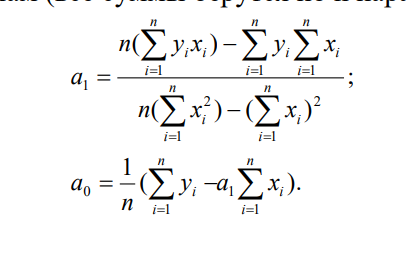
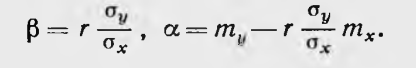
Коэффициент бета называется - коэффициентом линейной регресии

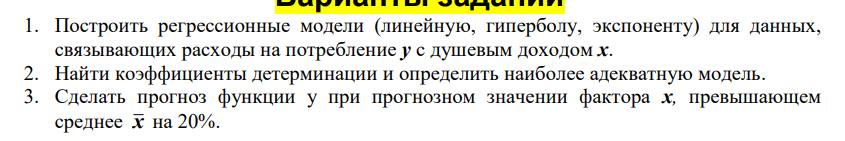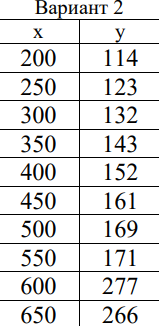

In [27]:
x = [200,250,300,350,400,450,500,550,600,650]
y = [114,123,132,143,152,161,169,171,277,266]
# test = list(map(lambda a,b: a * b, x,y))
# fig, ax = plt.subplots()  # Create a figure containing a single axes.
# ax.plot(x, y)  # Plot some data on the axes.

In [28]:
def mean(x):
    return sum(x) / len(x)

In [29]:
# функция прогнозирования
def predict(alpha, beta, x_i):
    return beta * x_i + alpha

In [30]:
def error(alpha,beta, x_i, y_i):
    return y_i - predict(alpha, beta, x_i)

In [31]:
def sum_of_squared_errors(alpha, beta, x,y):
    return sum(error(alpha,beta, x_i, y_i) ** 2
               for x_i, y_i in zip(x,y))

In [32]:
#метод наименьших квадратов
def least_squares_fit(x,y):
    beta = correlation(x,y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

In [33]:
# Вектор отклонений от среднего 
def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

In [34]:
#дисперсия это средняя сумма квадратов отклонений от среднего;
def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n-1)

In [35]:
def dot(v,w):
    return sum(v_i * w_i for v_i, w_i in zip(v,w))

In [36]:
def covariance(x,y):
    n = len(x)
    return dot(de_mean(x), de_mean(y))/(n-1)

In [37]:
def standard_deviation(x):
    return sqrt(variance(x))

In [38]:
def sum_of_squares(v):
    return dot(v,v)

In [39]:
def standard_deviation(x):
    return sqrt(variance(x))

In [40]:
def correlation(x,y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x,y) / stdev_x / stdev_y
    else:
        return 0


In [41]:
# Полная сумма квадратов 
def total_sum_of_squares(y):
    return sum(v ** 2 for v in de_mean(y))

In [42]:
# коэффциент детерминации
def r_squared(alpha,beta,x,y):
    return 1.0 - (sum_of_squared_errors(alpha,beta, x,y) / total_sum_of_squares(y))

In [43]:
alpha , beta = least_squares_fit(x,y);
print(alpha,beta) 
yx = [predict(alpha,beta,xi) for xi in x]
so=round(sum([abs(y[i] -yx[i]) for i in range(0,n)])/(n*sum(y))*100,3) # средняя ошибка аппроксимации

30.266666666666737 0.33066666666666655


Прогноз функции y при прогнозном значении фактора x, превышающем среднее x(425.0) на 20% тогда y = 198.90666666666667


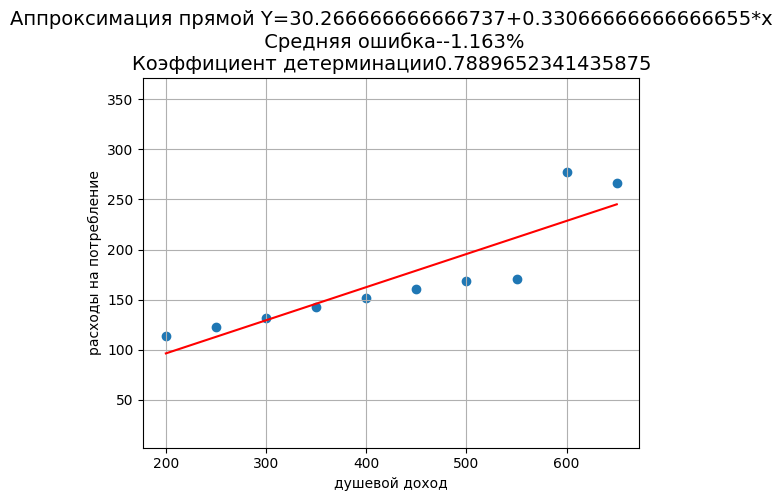

In [44]:
alpha , beta = least_squares_fit(x,y);

yx = [predict(alpha,beta,xi) for xi in x]
so=round(sum([abs(y[i] -yx[i]) for i in range(0,n)])/(n*sum(y))*100,3) # средняя ошибка аппроксимации
y_ = sum(y)/n
r_square = sum([(i - y_)**2 for i in yx])/sum([ (i - y_)**2 for i in y])

x_mean = sum(x)/n
y_predict = x_mean*1.20*beta+alpha
print(f"Прогноз функции y при прогнозном значении фактора x, превышающем среднее x({x_mean}) на 20% тогда y = {y_predict}")

plt.xlabel("душевой доход")
plt.ylabel("расходы на потребление")
plt.axis("equal")
plt.title('Аппроксимация прямой Y='+str(alpha)+'+'+str(beta)+'*x\n Средняя ошибка--'+str(so)+'%'+'\nКоэффициент детерминации'+str(r_square),size=14)
plt.scatter(x,y)
plt.plot(x,yx,"r")
plt.grid(True)
plt.show()

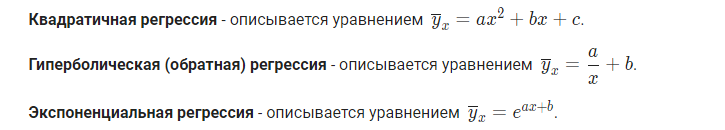
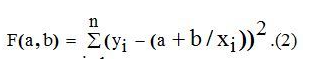

## Гиперболическая апроксимация

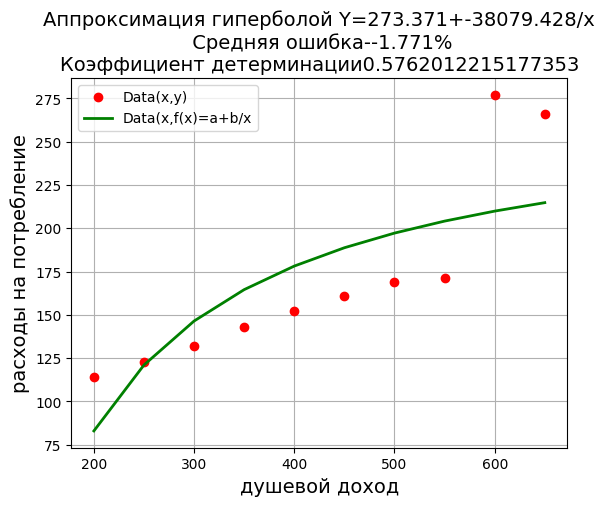

In [45]:
def mnkGP(x,y): # функция которую можно использзовать в програме
              n=len(x) # количество элементов в списках
              s=sum(y) # сумма значений y
              s1=sum([1/x[i] for i in  range(0,n)]) #  сумма 1/x
              s2=sum([(1/x[i])**2 for i in  range(0,n)]) #  сумма (1/x)**2
              s3=sum([y[i]/x[i]  for i in range(0,n)])  # сумма y/x                   
              a= round((s*s2-s1*s3)/(n*s2-s1**2),3) # коэфициент а с тремя дробными цифрами
              b=round((n*s3-s1*s)/(n*s2-s1**2),3)# коэфициент b с тремя дробными цифрами
              s4=[a+b/x[i] for i in range(0,n)] # список значений гиперболической функции              
              so=round(sum([abs(y[i] -s4[i]) for i in range(0,n)])/(n*sum(y))*100,3)   # средняя ошибка аппроксимации
              y_ = sum(y)/n
              r_squared = sum([(i - y_)**2 for i in s4])/sum([ (i - y_)**2 for i in y])
              plt.title('Аппроксимация гиперболой Y='+str(a)+'+'+str(b)+'/x\n Средняя ошибка--'+str(so)+'%'+\
                        '\nКоэффициент детерминации'+str(r_squared),size=14)
              plt.xlabel("душевой доход", size=14)
              plt.ylabel("расходы на потребление", size=14)
              plt.plot(x, y, color='r', linestyle=' ', marker='o', label='Data(x,y)')
              plt.plot(x, s4, color='g', linewidth=2, label='Data(x,f(x)=a+b/x')
              plt.legend(loc='best')
              plt.grid(True)
              plt.show()
             
x = [200,250,300,350,400,450,500,550,600,650]
y = [114,123,132,143,152,161,169,171,277,266]
# x = [125,150,200,250,300,350,400,500,600,700,800,900,1000,2000]
# y = [0.21,0.18,0.16,0.13,0.11,0.1,0.09,0.075,0.062,0.055,0.048,0.044,0.04,0.022]
mnkGP(x,y)

## Экспоненциальная апроксимация

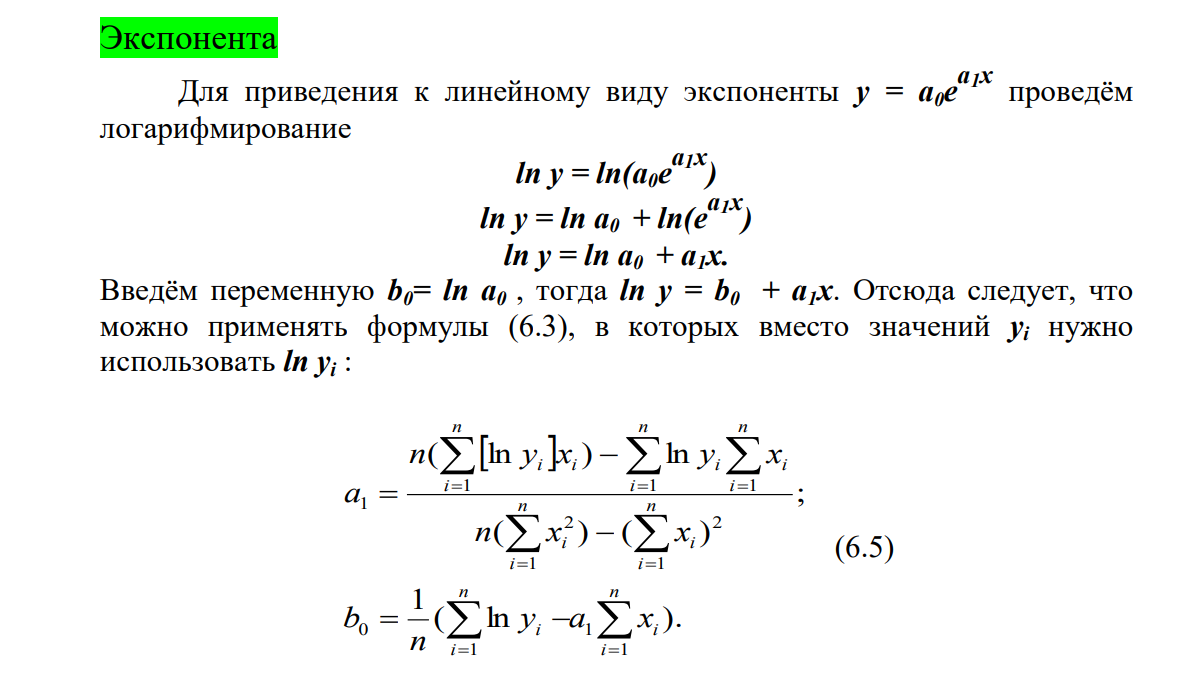
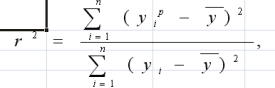

In [46]:
x = [200,250,300,350,400,450,500,550,600,650]
y = [114,123,132,143,152,161,169,171,277,266]
n = len(y)
a = (n*(sum([abs(log(y[i]))*x[i] for i in range(n)]))-(sum([log(i) for i in y])*sum([i for i in x])))\
    /(n*sum([i**2 for i in x]) - sum([i for i in x])**2)
b = (1/n)*(sum([log(i) for i in y]) -a*sum([i for i in x]))
s4=[exp(a*i+b) for i in x] # список значений гиперболической функции
so=round(sum([abs(y[i] -s4[i]) for i in range(0,n)])/(n*sum(y))*100,3) # средняя ошибка аппроксимации
y_ = sum(y)/n
r_squaree = sum([(i - y_)**2 for i in s4])/sum([ (i - y_)**2 for i in y])
r_squaree

0.6899801411228471

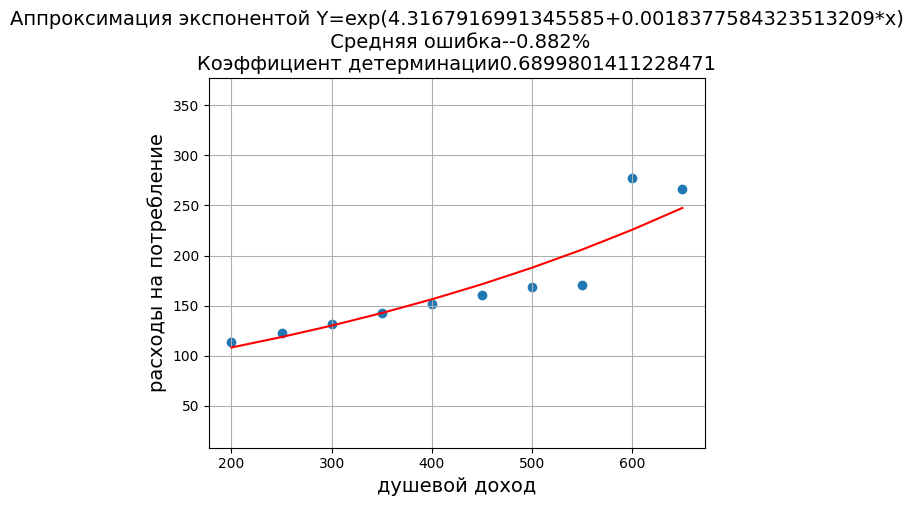

In [47]:
plt.xlabel("душевой доход", size=14)
plt.ylabel("расходы на потребление", size=14)
plt.axis("equal")
# plt.title("Анализ экспонентциальной регрессии")
plt.title('Аппроксимация экспонентой Y=exp('+str(b)+'+'+str(a)+'*x)\n Средняя ошибка--'+str(so)+'%'+'\nКоэффициент детерминации'+str(r_squaree),size=14)
plt.scatter(x,y)
plt.plot(x,s4,"r")
plt.grid("True")
plt.show()

In [50]:
  x = [1,2,3,4,5,6]
  y = [1.8, 4.5, 7.1,9.2 ,11.2 ,14.5] 
  beta = 2.45 
  alpha = -0.5
  m = sqrt(r_squared(alpha,beta,x,y))
  m

0.9976374881666086